# Octahedral symmetry

TODO:
* Video for each movement (No, Yes, Maybe)

## Group Definition

Definition using natural movements:
* No
* Yes
* Maybe

$$
NYN^{-1}M^{-1}=e \\
Y^{-1}MYN=e \\
NMN^{-1}Y=e
$$



How should I handle the groups definitions?
I want to make them into classes.
The classes should define:
- Arithmetic operations:  *, @, **, /
- ==
- `__array__`

They should also define how to map to and fro a standard representation (e.g. matrices).

Van Kampen diagrams.

In [1]:
import numpy as np
import manim as mnm
from manim import RIGHT, LEFT, UP, DOWN
from matplotlib import pyplot as plt

plt.style.use("dark_background")
mnm.config.media_embed = True

N_color = mnm.RED_C
Y_color = mnm.YELLOW_C
M_color = mnm.BLUE_D

Manim Community v0.17.2

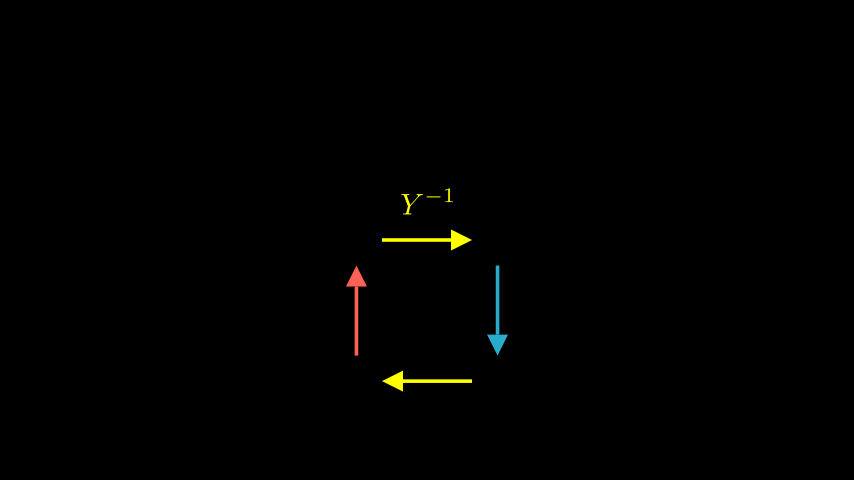

In [2]:
%%manim -v WARNING  --progress_bar None -s -ql --disable_caching Test

# Checkout the graph tutorial: https://slama.dev/manim/camera-and-graphs/

class Test(mnm.Scene):
    def construct(self):
        arrow_1 = mnm.Arrow(start=LEFT, end=RIGHT, color=Y_color) 
        arrow_2 = mnm.Arrow(
            start=UP, 
            end=DOWN,
            color=M_color
            ).next_to(arrow_1, RIGHT+DOWN)
        arrow_3 = mnm.Arrow(
            start=RIGHT, 
            end=LEFT, 
            color=Y_color
            ).next_to(arrow_2, DOWN+LEFT)
        arrow_4 = mnm.Arrow(
            start=DOWN, 
            end=UP, 
            color=N_color
            ).next_to(arrow_3, UP+LEFT)
        self.add(arrow_1)       
        self.add(arrow_2)
        self.add(arrow_3)
        self.add(arrow_4) 
        Y_inv = mnm.MathTex("Y^{-1}", color=Y_color).next_to(arrow_1, UP)
        self.add(Y_inv)

In [3]:
%%manim -ql -v WARNING GraphTest

class GraphTest(mnm.Scene):
    def construct(self):
        vertices = [1, 2, 3, 4]
        edges = [(1, 2), (2, 3), (3, 4), (4, 1)]
        lt = {1: UP+LEFT, 2: UP+RIGHT, 3: DOWN+RIGHT, 4: DOWN+LEFT}
        g = mnm.Graph(
            vertices, 
            edges, 
            layout=lt,
            edge_type=mnm.Arrow,
            edge_config={
                (1, 2): {'color': Y_color}
            }
        )
        Y_inv = mnm.MathTex("Y^{-1}", color=Y_color).next_to(g.edges[(1,2)], UP)
        self.add(Y_inv)
        self.add(g)
        

In [4]:
class CubeRep:
    mat_3x3: np.array
        
    def __init__(self, mat_3x3: np.array):
        """ Initialize the matrix with given 3x3 array. """
        self.mat_3x3 = np.array(mat_3x3)
        
    def __array__(self) -> np.array:
        return self.mat_3x3
    
    def __eq__(self, other) -> bool:
        return (np.array(self) == other).all()
    
    def inv(self):
        return CubeRep(np.linalg.inv(self))
    
    def __mul__(self, other):
        return CubeRep(np.array(self) @ np.array(other))
    
    __matmul__ = __mul__
    
    def __pow__(self, n: int):
        if n == 0:
            return CubeRep.e
        if n < 0:
            return self.__pow__(-n)
        return self*self.__pow__(n-1)
    
    def __str__(self) -> str:
        return str(self.mat_3x3) 

    def __repr__(self) -> str:
        return repr(self.mat_3x3) 
    
# For these matrices I put x axis going up aligned with the body
# I put y axis pointing to my right and z axis going straight in the gaze direction
CubeRep.e = CubeRep(np.eye(3))
# No maps z on y
CubeRep.N = CubeRep([
    [1,  0, 0],
    [0,  0, 1],
    [0, -1, 0]
])
# Yes maps x on z
CubeRep.Y = CubeRep([
    [0, 0, -1],
    [0, 1,  0],
    [1, 0,  0]
])
# Maybe maps x to y
CubeRep.M = CubeRep([
    [0, -1, 0],
    [1, 0, 0],
    [0, 0, 1]]
    )
CubeRep.Y2 = CubeRep.Y**2
CubeRep.N2 = CubeRep.N**2
CubeRep.M2 = CubeRep.M**2
CubeRep.YN = CubeRep.Y * CubeRep.N
CubeRep.r = CubeRep.YN
CubeRep.r2 = CubeRep.YN**2

In [5]:
assert CubeRep.N*CubeRep.Y.inv()*CubeRep.M*CubeRep.Y == CubeRep.e
assert (CubeRep.N@CubeRep.Y@CubeRep.N.inv()@CubeRep.M.inv()
        == CubeRep.e), "Failing defining relation"
assert (CubeRep.Y.inv()@CubeRep.M@CubeRep.Y@CubeRep.N
        == CubeRep.e), "Failing defining relation"
assert (CubeRep.N@CubeRep.M@CubeRep.N.inv()@CubeRep.Y
        == CubeRep.e), "Failing defining relation"
assert CubeRep.YN**3 == CubeRep.e
np.testing.assert_allclose(
    np.linalg.det([np.array(CubeRep.Y), np.array(CubeRep.N), np.array(CubeRep.M)]),
    [1,1,1],
    err_msg="Expect all the generators to have unit determinant"
)

In [16]:
CubeRep.M.inv()*CubeRep.N.inv()*CubeRep.Y.inv()*CubeRep.N

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])


### More Relations
From which we can deduce

$$
N^{-1}YN=M^{-1}\\
N^{-1}MN=Y \\
NYN^{-1}=M \\
NMN^{-1}=Y^{-1} \\
M^{-1}YM=N \\
M^{-1}NM=Y^{-1} \\
MYM^{-1}=N^{-1} \\
MNM^{-1}=Y \\
Y^{-1}MY=N^{-1} \\
Y^{-1}NY=M \\
YNY^{-1}=M^{-1} \\
YMY^{-1}=N \\
$$

Relations related to squares

These 3 relations can be obtained easily by squaring some of conjugation ones.

$$
M^{-1}Y^2M=N^2 \\
M^{-1}N^2M=Y^2 \\
N^{-1}Y^2N=M^2
$$

All the squares commute:

$$
M^2N^2=N^2M^2 \\
M^2Y^2=Y^2M^2 \\
N^2Y^2 = Y^2N^2
$$

Action of squares on generators:

$$
M^2NM^2=N^{-1} \\
M^2YM^2=Y^{-1} \\
N^2YN^2=Y^{-1} \\
$$

In general we have $$g^2xg^2=x^{-1}$$ where both x and g are one of the 3 generators.

### Group Structure

Assuming $M^2,N^2,e$ are 3 distinct elements,
we have that $<M^2,N^2,Y^2> ~ {\mathbb Z / 2 \mathbb Z}^2$.

O acts by conjugation on the orbit $\{M^2, N^2, Y^2\}$,
and we get a map:
$$\pi: O \rightarrow S(\{M^2, N^2, Y^2\}) \sim S_3$$

Which leads to a short exact sequence:

$$0 \rightarrow \text{Ker }\pi \rightarrow O \rightarrow S_3 \rightarrow 0$$

Because $<Y^2,N^2>$ is Abelian, $<N^2, Y^2> \subset \text{Ker }\pi$

Let $s \in \text{Ker }\pi$, we can write $s=Y^aN^bM^c$.
Since s is in the kernel, we have $M^2sM^2=s$, we also have,
using the commutation relations on the squares:
$$M^2Y^aN^bM^cM^2=Y^{-a}N^{-b}M^{-c}=Y^aN^bM^c$$.
After further manipulations, we obtain $a \equiv c \equiv 0 [mod 2]$.

Repeating the same computation but conjugating with $N^2$, we obtain that $b \equiv 0 [\mod 2]$ as well and $s \in <Y^2, N^2>$

Finally, $\text{Ker }\pi = <Y^2, N^2>$.
And we have the short exact sequence:

$$0 \rightarrow <Y^2, N^2> \rightarrow O \rightarrow S_3 \rightarrow 0$$

Now, we need to show that this sequence splits, by exhibiting a suitable copy of S3 in O.

We have:

$$
(YN)^3=e \\
(N^2Y)^2=e \\
(N^2Y)(YN)(N^2Y) = N^{-1}Y^{-1}
$$

Which means that $<YN,N^2Y> \sim S_3$, and we easily check that it right splits the above exact sequence.

The subgroup $<YN, N^2Y>$ is made of the following elements:
* $e, YN, N^{-1}Y^{-1}$
* $N^2Y, N^2M, M^2N$

The subgroup $<NY^{-1}, N^2Y>$ is the $Y^2$ conjugate of the previous one
* $e, YN^{-1}, NY^{-1}$
* $N^2Y, Y^2M, Y^2N$

The subgroup $<NY, M^2Y>$ is the $M^2$ conjugate of the first
* $e, Y^{-1}N^{-1}, NY$
* $M^2Y, N^2M, Y^2N$

The subgroup $<Y^{-1}N, M^2Y>$ is the $N^2$ conjugate of the first
* $e, Y^{-1}N, N^{-1}Y$
* $M^2Y, Y^2M, M^2N$

### Writing of the group elements

It follows from the decomposition and the structure of the group,
that we can write every element in the form:

$$k\{e, Y,N,M,YN,N^{-1}Y^{-1}\}, k \in <N^2,Y^2>$$

### Conjugacy classes

* Nothing: $e$
* **3** -> 180 rotations "facewise": $N^2,Y^2,M^2$
   * $(C_2 \times C_2) \rtimes C_2$ stabilizer  
      For $N_2$, this group is $\langle N^2, M^2, Y^2N \rangle$,
      where $\langle N^2,M^2 \rangle$ is the normal Klein 4-group and $Y^2N$
      acts on it by swapping $N^2 \leftrightarrow M^2$. 
* **6** -> 90 rotations: $Y,N,M,Y^{-1}, N^{-1}, M^{-1}$
   * $C_4$ stabilizer
* **6** -> 180 rotations $Y^2N, Y^2M, N^2Y, N^2M, M^2Y, M^2N$
   * $C_2 \times C_2$ stabilizer
   * For $Y^2N$ can be given explicitely as $\langle Y^2N, N^2\rangle$
* **8** -> 120 rotations: $YN, N^{-1}Y^{-1}, Y^{-1}N^{-1}, NY, Y^{-1}N, N^{-1}Y, NY^{-1}, YN^{-1}$
   * $C_3$ stabilizer

### Subgroups

$O$ has 2 proper normal subgroups:
$$0 \triangleleft \langle N^2, Y^2 \rangle \triangleleft \langle N^2, Y^2, YN \rangle
\triangleleft O$$

Make a diagram of the subgroup lattice, use manim??

### An Ordering of the Group

We want to label each group element with a number from 1 to 24.

We will first divide the group elements into 6 faces:
the first 4 elements 1,2,3,4 lie in face 1, 5,6,7,8 lie in face 2, etc.

We assume the 6 faces are arranged like in a dice, with 1 facing 6, 2 facing 5 and 3 facing 4.

Each face has a leader, which is the smallest number on this list.

Maybe maps element of the same face in order.

* 1 = e
* 2 = M, 3 = M^2, 4 = M^3
* _Oposite face property_: We (arbitrarily) choose that if a is a leader, then doing $aN^2a^{-1}$ from a gets you a to new leader of the opposite face.
* From this we deduce _face 6__ -> $21=N^2, 22=M^{-1}N^2, 23=M^{-2}N^2, 24=MN^2$  
    * Note that we are rotating of M every time but that rotation is applied "from the starting point". A rotation of M from N^2 is a rotation of $N^2MN^{-2}=M^{-1}$
* What is "doing N^2 from a"? I need a condition for this...
    "doing N^2 from a" is like doing N2 first and then doing a.
    So we have "doing N^2 from a" = $(aN^2a^{-1})a$.  
    __This also explains why it feels like the group multiplication is in the wrong order!!__
* We want YN to map faces 1->2->3 and map leader to leader.
* So we have: leader face 2 $5 = YN$ and the leader of face 3 $9 = (YN)^2 = N^{-1}Y^{-1}$
* Using the opposite face property we find: leader of face 5: $17 = (YNN^2(YN)^{-1})YN = M^2YN$ as well as the leader of face 4: $13 = ((YN)^{-1}N^2YN)N^{-1}Y^{-1} = Y^2N^{-1}Y^{-1}$

__Complete enumeration__:
* Face __1__: $[e,M,M^2,M^3]$, in-face rotator: $M$
* Face __2__: $[YN, N, Y^2YN, Y^2N]$, in-face rotator: $Y^{-1}$
* Face __3__: $[N^{-1}Y^{-1}, M^2Y, N^2(YN)^{-1}, Y^2Y]$, in-face rotator: $N^{-1}$
* Face __4__: $[Y^2(YN)^{-1}, N^2Y, M^2(YN)^{-1}, Y]$, in-face rotator $N$
* Face __5__: $[M^2YN, M^2N, N^2YN, N^3]$, in-face rotator $Y$
* Face __6__: $[N^2, N^2M, Y^2, Y^2M]$, in-face rotator $M^{-1}$

In [59]:

class PermPrez:
    """ Permutation representation of an element of O. """
    
    group_ordering = np.stack([I3, M, M@M, M@M@M, 
                               Y@N, N, Y@Y@Y@N, Y@Y@N,
                               YN_i, M@M@Y, N@N@YN_i, Y@Y@Y,
                               Y@Y@YN_i, N@N@Y, M@M@YN_i, Y,
                               M@M@YN, M@M@N, N@N@YN, N@N@N,
                               N@N, N@N@M, Y@Y, Y@Y@M
                              ])
    
    permutation: np.array
        
    @staticmethod
    def index_in_group_ordering(el):
        """ Give the index of el in the group enumeration. """
        return np.argwhere(
            np.sum(el == PermPrez.group_ordering, axis=(1,2)) == 9
        )[0,0]

    @staticmethod
    def permutation_prez(g):
        """ The Cayley embedding. """
        return np.array(
            [PermPrez.index_in_group_ordering(el) for el in g@PermPrez.group_ordering]
        )

    def __init__(self, g: np.array):
        g = np.array(g)
        # g is a 3x3 matrix
        if g.shape == (3,3):
            self.permutation = PermPrez.permutation_prez(g)
        # g is already given as a permutation
        elif g.shape == (24,):
            self.permutation = g
        
    def get_perm(self):
        return self.permutation
    
    def enumeration_index(self) -> int:
        """ Return the index of the element in this group enumeration. """
        return self.permutation[0]
    
    def to_cuberep(self) -> CubeRep:
        return CubeRep(PermPrez.group_ordering[self.permutation[0]])
    
    def __array__(self):
        return self.permutation
    
    def __iter__(self):
        return iter(self.permutation)
    
    def __mul__(self, other):
        return PermPrez(self.permutation[other.permutation])
    
    __matmul__ = __mul__
    
    def inv(self):
        return PermPrez(self.to_cuberep().inv())
        
    def __pow__(self, n: int):
        if n < 0:
            return self.inv().__pow__(-n)
        if n == 0:
            return PermPrez.e
        return self @ self.__pow__(n-1)
    
    def __eq__(self, other):
        return (self.permutation == other.get_perm()).all()
    
    def __str__(self):
        return str(list(self.permutation))
    
    def __repr__(self):
        return repr(list(self.permutation))
    
PermPrez.e = PermPrez(CubeRep.e)
PermPrez.Y = PermPrez(CubeRep.Y)
PermPrez.N = PermPrez(CubeRep.N)
PermPrez.M = PermPrez(CubeRep.M)
PermPrez.r = PermPrez.Y @ PermPrez.N

In [60]:
random_indices = np.random.choice(range(24), 2, replace=True)
g, h = PermPrez.group_ordering[random_indices]
assert PermPrez(g)*PermPrez(h) == PermPrez(g@h), (
    "The Cayley embedding need"
    "to respect the product operation."
)

identity_perm = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,
                 19,20,21,22,23]
assert (PermPrez.e.get_perm() == identity_perm).all(), (
    "The Cayley embedding must take identities to identities."
)

In [61]:
assert PermPrez.M.enumeration_index() == 1, "M should be assigned number 1"
assert PermPrez.r.enumeration_index() == 4, "YN should be number 4"
assert (PermPrez.r**2).enumeration_index() == 8, "YN_i should be number 8"

TODO:
* Find out how to have transparency
* Turn the faces accordingly

The current issue that I have is that the faces are there in place,
but I cannot see them when I have some windows there.

The solution would be to have some transparency.
The best solution would be that whenever I press a moving key,
the windows become quite transparent, and then,
maybe 1 or 2 seconds after the moving key has been released,
reset the transparency.

## Fundamental Domain

TODO:
* Fundamental Domain

The "all-positive" region: $x>0, y>0, z>0$ maps to the whole sphere, through the action of the group $<N, M^2>$, which is isomorphic to $D_4$.

That means that this region contains 3 fundamental domains.

- The map $YN$ maps this region to itself.

$e_x \mapsto e_z \mapsto e_y$

And this map has order 3.

We also note that the ray $\mathbb{R}\begin{pmatrix} 1 \\ 1 \\ 1\end{pmatrix}$, 
noted $\mathbb{R}c$ is fixed by this map.

The plane $\mathcal{D_0}: y-z=0$ contains the points 0, c and $e_x$

__Lemma__ Transformation of a plane equation by a linear endomorphism L.
Let $P \in {\mathbb{R}^3}^{*}$. $P(L(x)) = 0$ iff $(L^TP)X=0$

$\mathcal{D_0}$ is mapped to $\mathcal{D_1}: x-y=0$ by $(YN)^{-1}$, which is a plane that passes by 0, c and $e_z$

We are going to restrict further the region by restricting to the left of $D_0$ and above $D_1$.

We can summarize all the constraints by: $0 < y < z$ and $0 < y < x$


In the $e_x, e_y$ plane, we can project down the fundamental region to a triangle:
* Line from 0 to ex
* Line form ex to c
* Line from c to 0

In [49]:
basis = np.array([[0,1], [-1,0]])
c = 1/np.sqrt(3) * np.array([-1,1])
origin = np.array([[0, 0],[0, 0]]) # origin point

plt.figure(figsize=(5,5))
plt.xlim(-1.25, 0.25)
plt.ylim(-0.25, 1.25)

t1 = plt.Polygon(np.stack([[0,0],c, basis[0,:]]), color='g')
plt.gca().add_patch(t1)
plt.text(*c, "Fundamental Domain")

plt.quiver(*origin, basis[:,0], basis[:,1], 
           color=['r','b'], scale=1, angles="xy", scale_units="xy"
          )
plt.text(0,1,"e_x",color='r')
plt.text(-1,0.05,"e_y",color='b')
plt.show()


We'll note $S$ the surface of the 2D sphere.

In this cell, we're going to work with a single chart,
centered around the sphere point $(0,0,1)$.

The __pixel space__ where is shown the projection is chosen to be $[-1,1]^2$.

Let's call the fundamental domain, as a subset of the sphere $\mathcal{T}$.

The __chart__ is a bijective map from an open on the surface to pixel space 
$\phi_e: S \supset U \rightarrow [-1,1]^2$.

We ask that $(0,0,1) \in U$ and $\mathcal{T} \subset S$,
and we have the centering property: $\phi_e(0,0,1) = (0,0)$.

Given this basic map,
we can obtain other maps for different positions and orientations on the Sphere.
Let's pick a $g \in \text{SO}(R)$ and use it to make the map 
$\phi_g: g\cdot U \rightarrow [-1,1]^2$ 
which is centered in $g \cdot (0,0,1)$,
given by $\phi_g(s) = \phi_e(g^{-1} \cdot s)$.

If we consider the space of all maps from a region of the sphere to the pixel space,
then all the maps $\left ( \phi_g \right )_{g\in\text{SO}(R)}$ form an orbit.


Let's say I have a patch,
which is given as a function on the 2D triangle $\phi_e^{-1}\{\mathcal{T}\}$ above,
as a subset of $\mathbb{R}^2$.

If the colors are in black and white,
it can be modelled as a function $f: \phi_e^{-1}\{\mathcal{T}\} \rightarrow \mathbb{R}$.

The function f is in some sense the "local solution" of this problem,
as it answers this question on the domain: $\phi_e^{-1}\{\mathcal{T}\} \subset [-1,1]^2$.
We now need to __extend__ this solution, to the rest of the pixel space.

We're obviously going to use symmetry arguments to do the extension.

This local solution works when using the coordinate map $\phi_e$.
But if we're at a configuration given by $g \in \text{SO}(3)$,
and so using the map $\phi_g$, will it also work?

Let p be a point in the pixel space.
If $\phi_g^{-1}(p) \in \mathcal{T}$,
then we have $\text{color}(p) = f(\phi_g^{-1}(p))$

Let's consider that we are currently using the map $\phi_g$ centered at $g \cdot (1,0,0)$.

Our end goal is to obtain a map $[-1,1]^2 -> \mathbb{R}$ which gives the color at each point of the screen.

Let $p \in [-1,1]$ be a point of the pixel space,
which is not in $\phi_e^{-1}\{\mathcal{T}\}$,
then obviously its image is not in $\mathcal{T}$.
But there exists a unique $g \in O$, such that $g^{-1} \cdot \phi_e^{-1}(p) \in \mathcal{T}$

We note t the function $t: S \rightarrow O$,
that associates this unique element.
Thus we have $t(s) \subset O$ is the unique element such that $t(s)^{-1} \cdot s \in \mathcal{T}$.

Equivalently, 
$\forall g \in O, s \in \mathcal{T}, t(g \cdot s) = g$

So we need to color p with 
$$\left \{ \begin{aligned} f(\phi_e(t(s)^{-1} \cdot s)) \\
s = \phi_g^{-1}(p) \end{aligned} \right . $$

Alternatively, we have the expression:

$$\left \{ \begin{aligned} f(\phi_{t(s)}(s)) \\
s = \phi_g^{-1}(p) \end{aligned} \right . $$

Questions: * Write the expression of the actual projection f used in the app  
    It's written in terms of tangents...
    * Check whether the tangents expression respects the identity 
         $\phi_g(s) = \phi(g^{-1} \cdot s)$
* Is the fundamental triangle totally in the identity projection?
* Make the t function
* Test the t function by making a visualization that shows one color for each tile
* Write it in terms of arrays -> think of terms of the implementation



## Representation Theory

A representation for V can be obtained by using the matrices -Y, -N and -M as generators.


| Representation/Conjugacy class 	| e 	| Y2 (3) 	| 90 rot (6) 	| N2M (6) 	| 120 rot (8) 	|
|--------------------------------	|---	|--------	|------------	|---------	|-------------	|
| Trivial                        	| 1 	| 1      	| 1          	| 1       	| 1           	|
| S3 sign rep                    	| 1 	| 1      	| -1         	| -1      	| 1           	|
| S3 std                         	| 2 	| 2      	| 0          	| 0       	| -1          	|
| Cube                           	| 3 	| -1     	| 1          	| -1      	| 0           	|
| V                              	| 3 	| -1     	| -1           	| 1       	| 0           	|

In [50]:
trivial_character = np.array([1,1,1,1,1])
sign_character = np.array([1,1,-1,-1,1])
triangle_character = np.array([2,2,0,0,-1])
cube_character = np.array([3,-1,1,-1,0])
V_character = np.array([3,-1,-1,1,0])
def class_functions_scalar_product(f1, f2=None):
    if f2 is None:
        f2 = f1
    return 1/24*(f1[0]*f2[0] + 3*f1[1]*f2[1] + 6*f1[2]*f2[2] +
                 6*f1[3]*f2[3]+8*f1[4]*f2[4]
                )

In [51]:
poly_deg2_char = np.array([6,2,0,2,0])
class_functions_scalar_product(poly_deg2_char)
class_functions_scalar_product(trivial_character, poly_deg2_char)
class_functions_scalar_product(triangle_character, poly_deg2_char)
class_functions_scalar_product(V_character, poly_deg2_char)

1.0

We obtain the following decomposition for homogeneous polynomials of degree 2:
* $x^2+y^2+z^2$ is an invariant
* $x^2-y^2$ and $y^2-z^2$ generates a subrepresentation isomorphic to the triangle irep
* $xy$, $yz$ and $xz$ generates a subrepresentation isomorphic to the irep V.

In [52]:
class TriangleRep:
    Q = np.array([[1,                 np.cos(2*np.pi/3)],
                  [np.cos(2*np.pi/3), 1                ]])
    
    mat_2x2: np.array
        
    def __init__(self, mat_2x2):
        self.mat_2x2 = mat_2x2
        
    def __array__(self):
        return self.mat_2x2
    
    def __mul__(self, other):
        if isinstance(other, TriangleRep):
            return TriangleRep(np.array(self) @ np.array(other))
        return np.array(self) @ np.array(other)
    
    __matmul__ = __mul__
    
    def inv(self):
        return TriangleRep(np.linalg.inv(self))
    
    @staticmethod
    def basis_x2_minus_y2(points_3d):
        points_3d = np.array(points_3d)
        if points_3d.shape == (3,):
            points_3d = points_3d.reshape((3,1))
        x, y, z = points_3d[0,:], points_3d[1,:], points_3d[2,:]
        return x**2 - y**2
    
    @staticmethod
    def basis_y2_minus_z2(points_3d):
        points_3d = np.array(points_3d)
        if points_3d.shape == (3,):
            points_3d = points_3d.reshape((3,1))
        x, y, z = points_3d[0,:], points_3d[1,:], points_3d[2,:]
        return y**2 - z**2
    
    @staticmethod
    def apply(func_coords, points_3d):
        b1, b2 = func_coords
        return (b1*TriangleRep.basis_x2_minus_y2(points_3d) +
                b2*TriangleRep.basis_y2_minus_z2(points_3d)
               )

    @staticmethod
    def scalar_product(f1, f2=None):
        if f2 is None:
            f2 = f1
        return f1.transpose()@TriangleRep.Q@f2

TriangleRep.e = TriangleRep(np.eye(2))
TriangleRep.Y = TriangleRep(np.array([[ 0, -1],
                                      [-1,  0]]))
TriangleRep.M = TriangleRep(np.array([[-1, 1],
                                      [ 0, 1]]))
TriangleRep.N = TriangleRep(np.array([[1,  0],
                                      [1, -1]]))

In [53]:
random_3d_point = np.random.normal(size=3)
TriangleRep.basis_x2_minus_y2(np.array([1,0,0]))
assert (TriangleRep.apply([1,0], random_3d_point) ==
        TriangleRep.basis_x2_minus_y2(random_3d_point)
       ), "Error in combining basis functions."

random_triangle_func = np.random.normal(size=2)
assert (TriangleRep.apply(TriangleRep.Y@random_triangle_func, 
                          random_3d_point
                         ) ==
        TriangleRep.apply(random_triangle_func, 
                          Y@random_3d_point
                         )
       ), "Failing the fundamental relations of acting on functions for Y."

np.testing.assert_allclose(
    TriangleRep.apply(TriangleRep.N@random_triangle_func, 
                          random_3d_point
                         ),
    TriangleRep.apply(random_triangle_func, 
                          N@random_3d_point
                         ),
    err_msg="Failing the fundamental relations of acting on functions for N."
)

np.testing.assert_allclose(
    TriangleRep.apply(TriangleRep.M@random_triangle_func, 
                          random_3d_point
                         ),
    TriangleRep.apply(random_triangle_func, 
                          M@random_3d_point
                         ),
    err_msg="Failing the fundamental relations of acting on functions for M."
)

np.testing.assert_allclose(
    TriangleRep.N@TriangleRep.Y.inv()@TriangleRep.M@TriangleRep.Y,
    TriangleRep.e,
    err_msg="Representation needs to verify the same relations."
)

YN takes b2 to b1, which means they have the same length, and that their angle is $2\pi\over 3$.

Normalizing the lengths to 1, we have $<b1,b2>=\cos{2\pi\over3}$, and so we can deduce the scalar product matrix Q.

How can we test the invariance of Q?
We have $Q(g \cdot f_1, g \cdot f_2) = Q(f_1,f_2)$


In [54]:
random_func = np.random.normal(size=(2,1))
np.testing.assert_allclose(
    TriangleRep.scalar_product(random_func),
    TriangleRep.scalar_product(TriangleRep.Y@random_func),
    err_msg="Scalar product needs to be invariant."
)

The "triangle func" are maps $\mathbb{R^3} \rightarrow \mathbb{R}$,
their differential is at a point is a linear functional.

We have $$d(b_1)_{x,y,z} = \begin{pmatrix}  2x && -2y && 0 \end{pmatrix}$$
and $$d(b_2)_{x,y,z} = \begin{pmatrix}  0 && 2y && -2z \end{pmatrix}$$

The conjecture here is that this ray does a circle, and that the cosine of this angle on this circle is given by the scalar product.

One idea is to find the rotation matrix around axis $c$ of quarter-turn angle.
Call this matrix R.
The conjecture is that matrices of the form $\cos\theta I + \sin\theta R$ rotate around the c-axis.

In [13]:
sq2, sq3, sq5 = np.sqrt([2, 3, 5])

base_change = np.array([[1,1,1],
          [1,-1,1],
         [1,0,-2]]) @ np.diag(1/np.array([sq2, sq3, sq5]))
np.linalg.det(base_change)

1.0954451150103324

In [14]:
# b_perp(x,y,z) = 1/sqrt(3)(x2 + y2 - 2z2)
b_perp = np.sqrt(3)/3*np.array([1, 2])
np.testing.assert_almost_equal(
    TriangleRep.scalar_product(np.array([1,0]), b_perp),
    0,
    err_msg="Non-orthogonal scalar product",
)
np.testing.assert_almost_equal(
    TriangleRep.scalar_product(b_perp),
    1,
    err_msg="Non-normalized basis vector"
)

In [15]:
r = np.random.normal(size=3)
(TriangleRep.apply([1,0], N@r),
TriangleRep.apply(TriangleRep.N@[1,0], r)
)

(array([-0.04922728]), array([-0.04922728]))

In [16]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

def plot_implicit(fn, bbox=(-2.5,2.5), ax=None):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, 15) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z')
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y')

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x')

    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)


def goursat_tangle(x,y,z):
    a,b,c = 0.0,-5.0,11.8
    return x**4+y**4+z**4+a*(x**2+y**2+z**2)**2+b*(x**2+y**2+z**2)+c 

def b1(x,y,z):
    return x**2-y**2

def b2(x,y,z):
    return y**2-z**2

def rb1(x,y,z):
    return x**2 + z**2 + 0.001*y**2

def b1_perp(x,y,z):
    return x**2 + y**2 - 2*z**2

In [17]:
# TODO(Manu): Plot b1, r.b1 and r2.b1
# Plot also some other random combinations
_, axs = plt.subplots(2, 2, subplot_kw={'projection': "3d"}, figsize=(9,9))
plot_implicit(b1, ax=axs[0,0])
plot_implicit(b2, ax=axs[1,0])
plot_implicit(rb1, ax=axs[0,1])
plot_implicit(b1_perp, ax=axs[1,1])

$b_{\perp}(x,y,z) = x^2+y^2-2z^2$

$(x-y)^2 = x^2+y^2 -2xy$

We notice that $b_{\perp}$ is invariant by rotations around $e_z$.

TODO(Manu):
* Plot the function  $b_{\perp}$ on the plane $(e_y,e_z)$

## Cohomology

The goal here is to give examples of
- cochains
- cocycles
- coboundaries
- cohomological groups

At least for the lowest ranks.

Let's start with the cohomology with coefficients in $\mathbb{Z}$, with the trivial O-action.

Noting $R = \mathbb{Z}[O]$, we can write the bar complex:
$$ ... \oplus_{g,h,l\in O^3} R\langle g,h,k\rangle \rightarrow \oplus_{g,h\in O^2} R\langle g,h\rangle \rightarrow \oplus_{g\in O} R\langle g\rangle \rightarrow R\langle\rangle \rightarrow \mathbb{Z} \rightarrow 0$$

With:
$$
\delta_0 \langle\rangle = 1 \\
\delta_1 \langle g\rangle = g\langle\rangle - \langle\rangle \\
\delta_2 \langle g,h\rangle = g\langle h\rangle - \langle gh\rangle + \langle g \rangle \\
\delta_3 \langle g,h,l \rangle = g\langle h, l\rangle - \langle gh, l\rangle 
+ \langle g,hl \rangle - \langle g,h \rangle\\
...
$$

We now apply the functor $\text{Hom}_R(\_,\mathbb Z)$ to this complex:

$$ ... 
\text{Hom}_R(\oplus_{g,h,l\in O^3} R\langle g,h,k\rangle, \mathbb{Z}) \leftarrow 
\text{Hom}_R(\oplus_{g,h\in O^2} R\langle g,h\rangle, \mathbb{Z}) \leftarrow 
\text{Hom}_R(\oplus_{g\in O} R\langle g\rangle, \mathbb{Z}) \leftarrow 
\text{Hom}_R(R\langle\rangle,\mathbb{Z}) \leftarrow
\text{Hom}_R(\mathbb{Z},\mathbb{Z}) \leftarrow 0$$

We can simplify, because the R linear maps from a free R-module are given by their image on the basis, which can be arbitrary:

$$ ... 
\mathcal C(O^3, \mathbb{Z}) \leftarrow 
\mathcal C(O^2, \mathbb{Z}) \leftarrow 
\mathcal C(O, \mathbb{Z}) \leftarrow 
\mathbb{Z} \leftarrow
\mathbb{Z} \leftarrow 0$$

Now we need to compute the differentials, we'll note $a \in \mathbb{Z}, g,h,l \in O$.
We also have 1 and 2 cochains respectively: 
$c_1: O \rightarrow \mathbb Z, c_2: O^2 \rightarrow \mathbb Z$

$$
\delta_0(a) = a\\
\delta_1(a)(g) = g\cdot a - a = 0\\
\delta_2(c_1)(g,h) = g \cdot c_1(h) -c_1(gh) + c_1(g) = c_1(h) - c_1(gh) + c_1(g) \\
\delta_3(c_2)(g,h,k) = g \cdot c_2(h,k) - c_2(gh,k) + c_2(g,hk) - c_2(g,h)
$$

Computations of the first few cocycles groups:

0. $\mathcal{Z}_{-1} = \ker\delta_0 = 0$
1. $\mathcal{Z}_0 = \mathbb{Z}$
2. $\mathcal{Z}_1 = \hom_{\text{Group}}(O,\mathbb{Z}) = 0$
3. $\mathcal{Z}_2 = \{c_2: O\times O\rightarrow \mathbb{Z} \space | \space
c_2(h,k) - c_2(gh, k) + c_2(g, hk) - c_2(g,h) = 0\}$

Interpretation of these groups

Computations of the first few coboundary groups.

0. $B_0 = \mathbb{Z}$
1. $B_1 = 0$
2. $B_2 = \{\delta_2(c_1) \ | \  c_1 \in \mathcal{C}(O,\mathbb{Z})\}
\sim \mathcal{C}(O,\mathbb{Z})$
2. $B_3 = \{\delta_3(c_2) \ | \  c_2 \in \mathcal{C}(O^2,\mathbb{Z})\}$

### Homomorphisms from O into an Abelian Group

Let A be an Abelian group and $\phi \in \hom(O,A)$.

Applying $\phi$ to the 3 defining relations of the group, we obtain
$\phi(Y)=\phi(N)=\phi(M)=a\in A$ with $a^2=0$.

We deduce that all such homomorphisms factor through:
$\hom(O, {\mathbb{Z}\over2\mathbb{Z}}) \sim {\mathbb{Z}\over2\mathbb{Z}}$.
Which is generated by the homomorphism that maps all the generators to -1.